In [5]:
import pickle
with open("spreadsheet_boolean.pkl", "rb") as f:
    df = pickle.load(f)

C:\Users\aswan\AppData\Local\Temp\ipykernel_17456\2884683019.py:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pickle.load(f)


In [6]:
import os
import joblib

# Function to train or load model
def safe_train(model, model_name, X_train, y_train):
    model_path = f"{model_name}.pkl"

    if os.path.exists(model_path):
        print(f"✅ {model_name} already trained! Loading instead of training...")
        return joblib.load(model_path)
    else:
        print(f"🚀 Training {model_name}...")
        model.fit(X_train, y_train)
        joblib.dump(model, model_path)
        print(f"✅ {model_name} trained & saved!")
        return model


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.set_index('date',inplace=True)

In [9]:
df.head()

,symbol,streak_len,direction,occurrence,performance,vol,ma5_pos,ma10_pos,ma20_pos,ma50_pos,ma100_pos,ma200_pos,ma5_neg,ma10_neg,ma20_neg,ma50_neg,ma100_neg,ma200_neg,next_day_actual,bin_name
date,,,,,,,,,,,,,,,,,,,,
2024-12-18,MIGI,4,-1,46,-1,1,0,0,0,0,0,0,-1,1,1,-1,-1,-1,0,4 -1 -1 -1 1 0 0 -1 -1
2024-12-18,PSNY,7,-1,8,1,1,0,0,0,0,0,0,1,1,-1,1,-1,-1,0,7 -1 1 1 1 0 0 1 -1
2024-12-18,AVNW,3,-1,536,1,1,0,0,1,0,0,0,-1,-1,0,1,1,1,0,3 -1 1 1 1 0 0 -1 1
2024-12-18,ANIP,3,-1,334,1,1,0,0,0,0,0,0,1,-1,-1,-1,1,1,0,3 -1 1 1 1 0 0 1 1
2024-12-18,GOODO,5,-1,10,1,-1,0,0,0,0,0,1,1,-1,1,-1,-1,0,0,5 -1 1 1 -1 0 1 1 0


In [10]:
df['next_day_actual'].value_counts()

next_day_actual
-1    1048978
 1    1041991
 0      98675
Name: count, dtype: int64

In [11]:
# removing all the 0 values (indicating no change) from next_day_actual
df = df[df['next_day_actual'] != 0]

In [12]:
df.shape

(2090969, 20)

In [13]:
# now the values in the next_day_actual is 1 and -1, so we convert -1 to 0
def convert_negative_to_zero(df, column_name):
    df[column_name] = df[column_name].replace(-1, 0)
    return df
df = convert_negative_to_zero(df, 'next_day_actual')

In [14]:
df['next_day_actual'].unique()

array([0, 1])

In [15]:
df.dtypes

symbol             object
streak_len         object
direction           int64
occurrence         object
performance         int64
vol                 int64
ma5_pos             int64
ma10_pos            int64
ma20_pos            int64
ma50_pos            int64
ma100_pos           int64
ma200_pos           int64
ma5_neg             int64
ma10_neg            int64
ma20_neg            int64
ma50_neg            int64
ma100_neg           int64
ma200_neg           int64
next_day_actual     int64
bin_name           object
dtype: object

In [16]:
df['streak_len'] = df['streak_len'].astype(int)
df.drop(columns=['symbol','bin_name','occurrence'],inplace=True)
df.head()

,streak_len,direction,performance,vol,ma5_pos,ma10_pos,ma20_pos,ma50_pos,ma100_pos,ma200_pos,ma5_neg,ma10_neg,ma20_neg,ma50_neg,ma100_neg,ma200_neg,next_day_actual
date,,,,,,,,,,,,,,,,,
2024-12-17,3,1,-1,1,0,0,0,0,0,1,1,1,-1,1,-1,0,0
2024-12-17,6,-1,1,-1,0,0,0,0,0,0,1,-1,-1,-1,-1,1,0
2024-12-17,3,1,-1,1,-1,1,1,1,1,1,0,0,0,0,0,0,1
2024-12-17,3,1,-1,1,-1,0,0,0,0,0,0,1,-1,-1,1,1,1
2024-12-17,4,-1,1,-1,0,0,0,0,0,0,-1,1,1,1,-1,-1,0


In [17]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df['next_day_actual']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

### One Hot Encoding all the columns

In [18]:
cols = x.columns.to_list()
cols

['streak_len',
 'direction',
 'performance',
 'vol',
 'ma5_pos',
 'ma10_pos',
 'ma20_pos',
 'ma50_pos',
 'ma100_pos',
 'ma200_pos',
 'ma5_neg',
 'ma10_neg',
 'ma20_neg',
 'ma50_neg',
 'ma100_neg',
 'ma200_neg']

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[cols])
encoded_cols = list(encoder.get_feature_names_out(cols)) # it retrieves the names of the new encoded features created by the OneHotEncoder and stores them in the list encoded_cols.

In [20]:
x_train[encoded_cols] = encoder.transform(x_train[cols])
x_test[encoded_cols] = encoder.transform(x_test[cols])

In [21]:
x_train.columns

Index(['streak_len', 'direction', 'performance', 'vol', 'ma5_pos', 'ma10_pos',
       'ma20_pos', 'ma50_pos', 'ma100_pos', 'ma200_pos', 'ma5_neg', 'ma10_neg',
       'ma20_neg', 'ma50_neg', 'ma100_neg', 'ma200_neg', 'streak_len_3',
       'streak_len_4', 'streak_len_5', 'streak_len_6', 'streak_len_7',
       'streak_len_8', 'streak_len_9', 'streak_len_10', 'streak_len_11',
       'streak_len_12', 'streak_len_13', 'streak_len_14', 'streak_len_15',
       'streak_len_16', 'streak_len_17', 'streak_len_18', 'streak_len_19',
       'streak_len_20', 'streak_len_21', 'streak_len_22', 'streak_len_23',
       'streak_len_24', 'streak_len_25', 'direction_-1', 'direction_1',
       'performance_-1', 'performance_0', 'performance_1', 'vol_-1', 'vol_0',
       'vol_1', 'ma5_pos_-1', 'ma5_pos_0', 'ma5_pos_1', 'ma10_pos_-1',
       'ma10_pos_0', 'ma10_pos_1', 'ma20_pos_-1', 'ma20_pos_0', 'ma20_pos_1',
       'ma50_pos_-1', 'ma50_pos_0', 'ma50_pos_1', 'ma100_pos_-1',
       'ma100_pos_0', 'ma100_pos_1

In [22]:
x_train = x_train[encoded_cols]
x_test = x_test[encoded_cols]

### Converting encoded columns & target column to boolean

In [23]:
# Create DataFrames with the encoded data
x_train_encoded_df = pd.DataFrame(x_train, columns=encoded_cols, index=x_train.index)
x_test_encoded_df = pd.DataFrame(x_test, columns=encoded_cols, index=x_test.index)

In [24]:
x_train = x_train_encoded_df.astype(bool)
x_test = x_test_encoded_df.astype(bool)
y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

### Training the model

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42) 

In [26]:
model = safe_train(model, "1_model", x_train, y_train)

🚀 Training 1_model...
✅ 1_model trained & saved!


In [27]:
model.score(x_train,y_train)

0.540107306720868

In [28]:
model.score(x_test,y_test)

0.5141058934370173

In [29]:
importance_df = pd.DataFrame({
    'Feature':x_train.columns, 
    'Importance':model.feature_importances_
}).sort_values('Importance', ascending=False)
importance_df

,Feature,Importance
1,streak_len_4,0.046132
0,streak_len_3,0.045631
2,streak_len_5,0.037812
30,vol_1,0.032720
28,vol_-1,0.032326
...,...,...
19,streak_len_22,0.000051
18,streak_len_21,0.000050
21,streak_len_24,0.000021
22,streak_len_25,0.000019


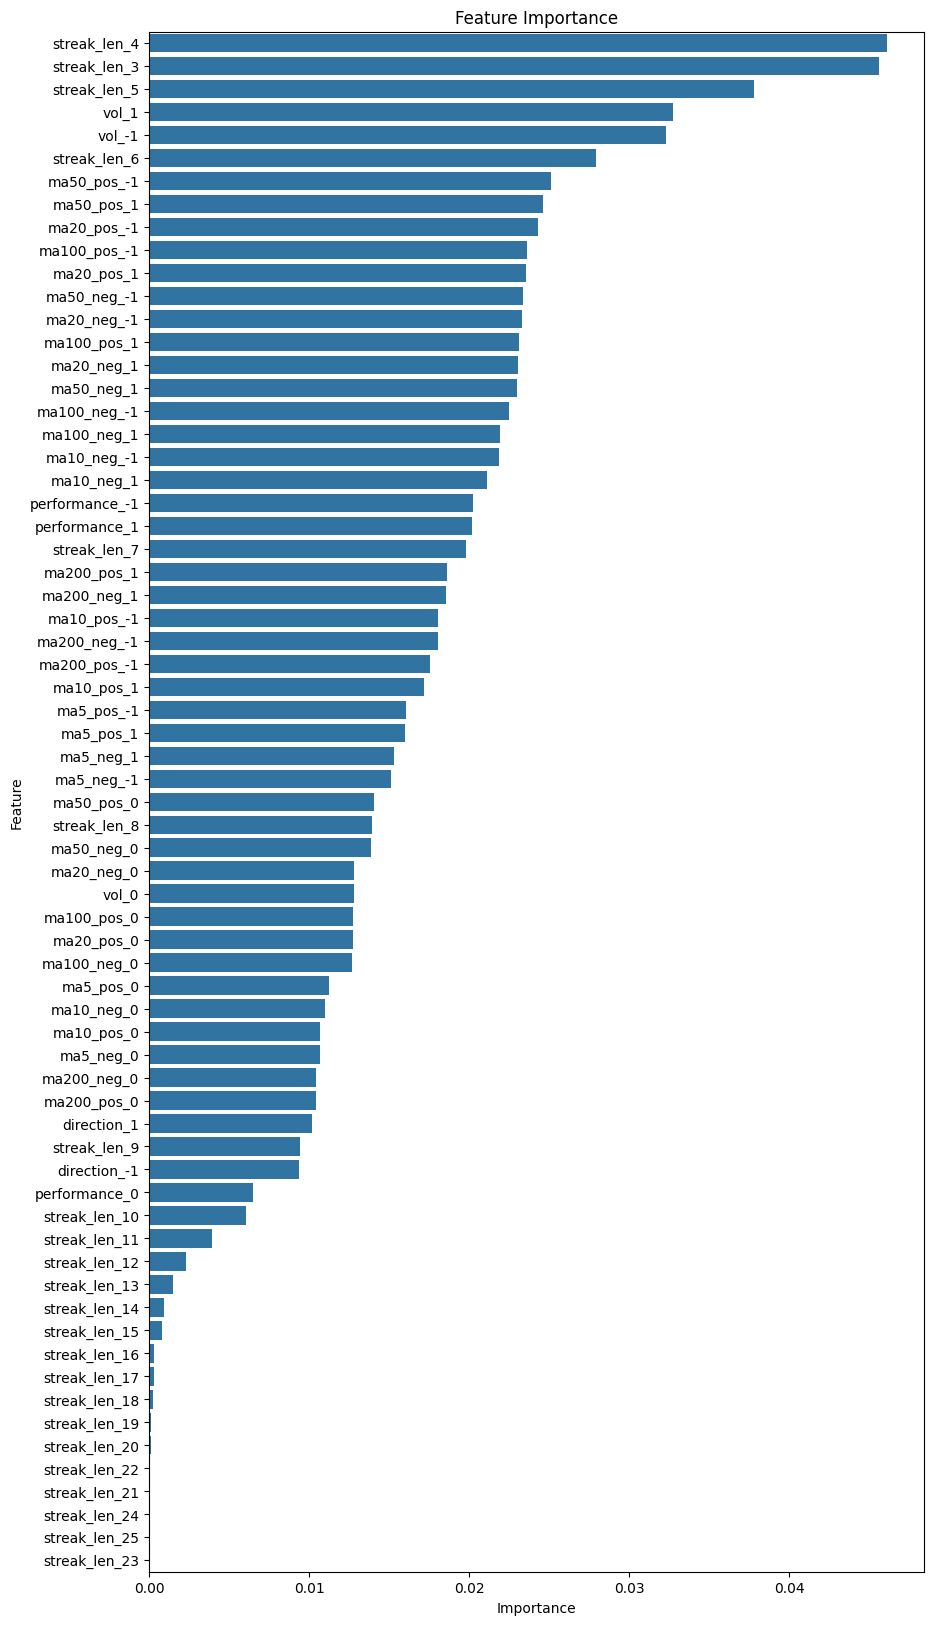

In [30]:
# Set the size of the plot
plt.figure(figsize=(10, 20))

# Create a horizontal bar plot
sns.barplot(data=importance_df, x='Importance', y='Feature')

# Set the title
plt.title('Feature Importance')

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()

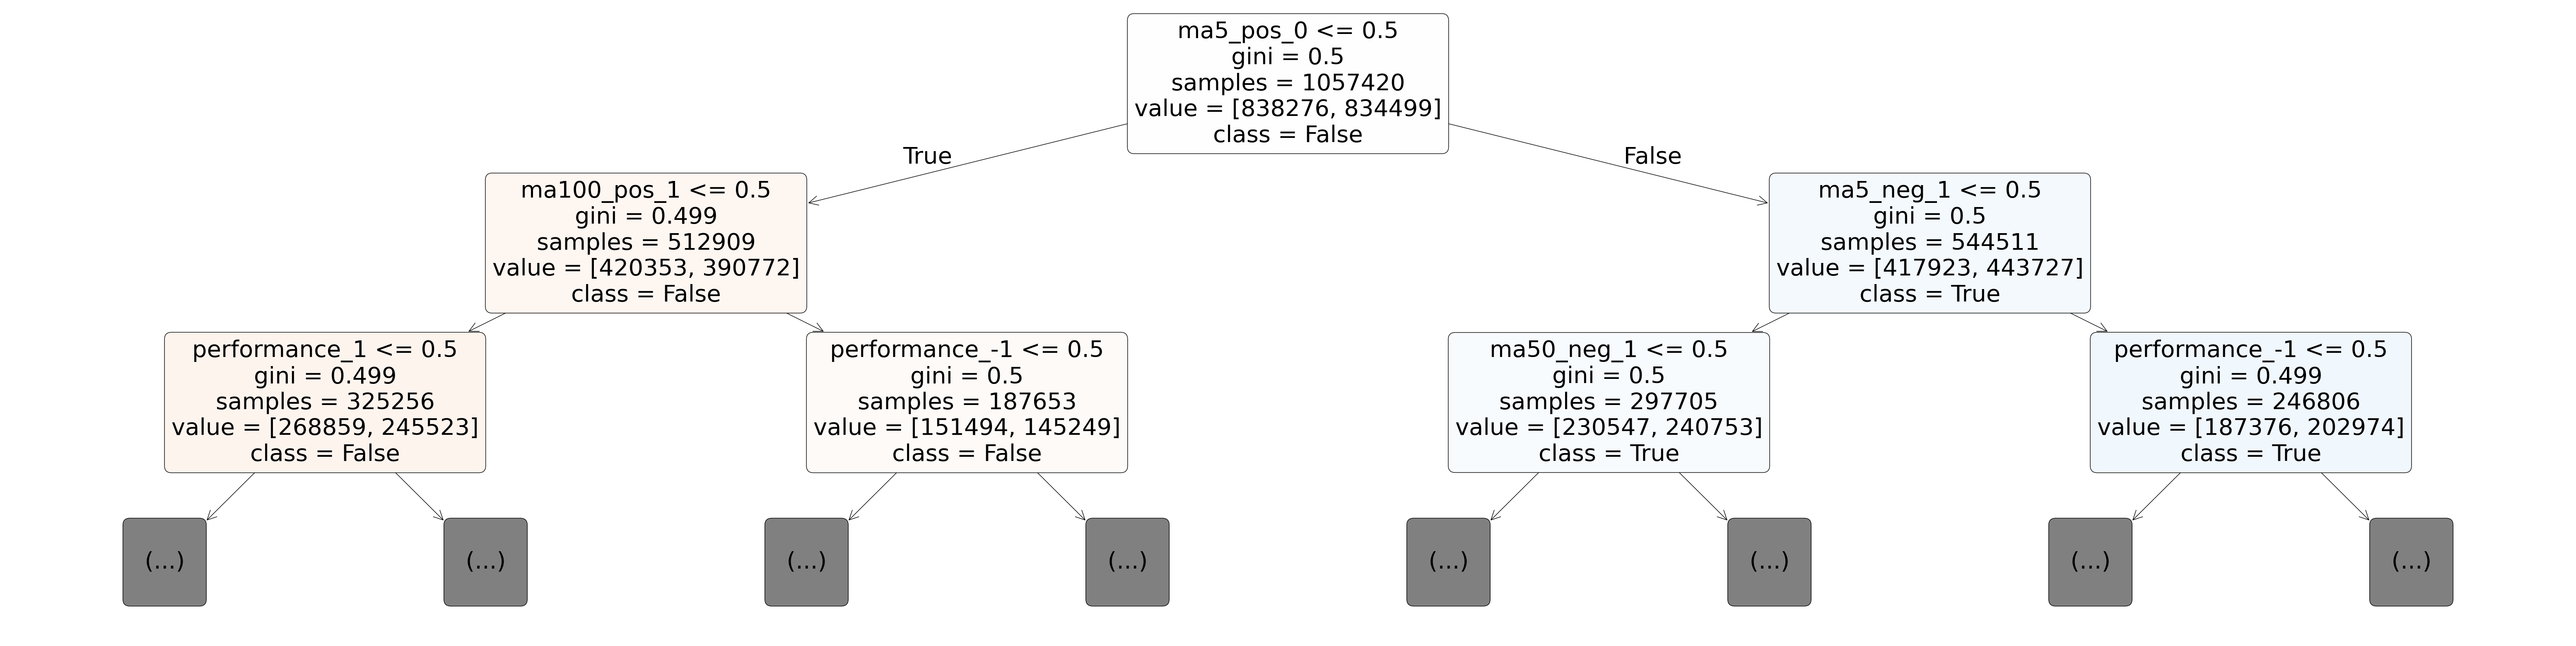

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], feature_names=x_train.columns, max_depth=2, filled=True, rounded=True, class_names=[str(cls) for cls in model.classes_]);
# model.estimator[] selects from different decision trees

### Hyperparameter Tuning

In [32]:
# helper function to make it easy to test hyperparameters
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, y_train)
    return model.score(x_train, y_train), model.score(x_test, y_test)

In [33]:
test_params(max_depth=5)

(0.517427627744317, 0.518766409848061)

In [34]:
# Error evaluation using RMSE
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b) ** 0.5  # Take the square root manually
preds = model.predict(x_train)
preds
rmse(preds, y_train)

0.6781538861343581

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_train, preds))
print(preds)

              precision    recall  f1-score   support

       False       0.54      0.56      0.55    838999
        True       0.54      0.52      0.53    833776

    accuracy                           0.54   1672775
   macro avg       0.54      0.54      0.54   1672775
weighted avg       0.54      0.54      0.54   1672775

[ True False False ... False  True  True]


In [36]:
test_params(max_depth=12)

(0.5293264186755541, 0.5191083564087481)

### Training seperately with seperate values of ma200_pos

In [37]:
ma200pos_pos = encoded_cols.copy()
ma200pos_pos.remove('ma200_pos_-1')
ma200pos_pos.remove('ma200_pos_0')

ma200pos_zero = encoded_cols.copy()
ma200pos_zero.remove('ma200_pos_-1')
ma200pos_zero.remove('ma200_pos_1')

ma200pos_neg = encoded_cols.copy()
ma200pos_neg.remove('ma200_pos_1')
ma200pos_neg.remove('ma200_pos_0')


In [38]:
x_train_pos= x_train[ma200pos_pos]
x_test_pos= x_test[ma200pos_pos]

x_train_zero= x_train[ma200pos_zero]
x_test_zero= x_test[ma200pos_zero]

x_train_neg= x_train[ma200pos_neg]
x_test_neg= x_test[ma200pos_neg]

In [39]:
model_pos = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42) 
model_pos = safe_train(model_pos, "1_model_pos", x_train_pos, y_train)

🚀 Training 1_model_pos...
✅ 1_model_pos trained & saved!


In [40]:
print(model_pos.score(x_train_pos,y_train), model_pos.score(x_test_pos,y_test))

0.5398281299039022 0.5142158902327628


In [41]:
model_zero = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42) 
model_zero = safe_train(model_zero, "1_model_zero", x_train_zero, y_train)

🚀 Training 1_model_zero...
✅ 1_model_zero trained & saved!


In [42]:
print(model_zero.score(x_train_zero,y_train), model_zero.score(x_test_zero,y_test))

0.5374883053608525 0.515495200791977


In [43]:
model_neg = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42) 
model_neg = safe_train(model_neg, "1_model_neg", x_train_neg, y_train)

🚀 Training 1_model_neg...
✅ 1_model_neg trained & saved!


In [44]:
print(model_neg.score(x_train_neg,y_train), model_neg.score(x_test_neg,y_test))

0.5398090000149453 0.5141226320798481


In [45]:
import joblib

# Dictionary to store all trained models
models = {
    '1_model': model,  
    '1_model_pos': model_pos,  
    '1_model_zero': model_zero,  
    '1_model_neg': model_neg  
}

# Save each model separately
for name, model in models.items():
    joblib.dump(model, f'{name}.pkl')

print("✅ All models saved successfully!")


✅ All models saved successfully!
